In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
import pickle

In [8]:
def load_artifact(targ_file:str):
    targ_path = os.path.join(dir,targ_file)

    with open(targ_path,'rb') as fp:
        test_artifact = pickle.load(fp)

    return test_artifact

In [9]:
# Each time that you initialize Dagster a new temporary folder is created.
# For the porpuse of this exercise we will save data in that temporary folder.
# Substitute tmp*** with your folder (you can fin it in this repo).
dir = "../tmpw7w4cmxn/storage/"

`core_data`

| Feature Name           | Description                                                  |
|------------------------|--------------------------------------------------------------|
| rating_account_id      | Unique identifier for the contract account                    |
| customer_id            | Unique identifier for the customer                           |
| age                    | Age of the customer                                          |
| contract_lifetime_days | Total duration of the customer contract in days              |
| remaining_binding_days | Number of days left in the contract binding period - usual binding period is 2 years        |
| has_special_offer      | Indicates if the customer has a special offer      |
| is_magenta1_customer   | Indicates if the customer is part of the Magenta1 program - fedelty program    |
| available_gb           | Amount of mobile data included in the current tariff         |
| gross_mrc              | Gross monthly recurring charge (in euros)                    |
| smartphone_brand       | Brand of the customer’s smartphone                           |
| has_done_upselling     | Whether the customer has already done an upsell in the last 3 years      |


In [10]:
core_data = load_artifact("core_data")
core_data

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling
0,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0
1,874537,5.452041,31,469,158,0,0,30,34.18,iPhone,0
2,433931,3.129000,42,274,-41,0,1,50,64.69,Samsung,0
3,283294,3.842640,44,373,157,0,1,40,58.06,iPhone,0
4,881198,1.203226,45,189,-82,1,0,0,39.49,Huawei,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,238206,5.295810,95,1754,129,1,0,50,56.73,Samsung,0
99996,542662,1.112621,86,1189,-78,0,1,0,7.65,Samsung,0
99997,946030,3.140776,89,1757,-654,0,1,0,26.22,Samsung,0
99998,827962,4.981519,96,1336,89,0,0,None,24.90,Xiaomi,0


`usage_info`

| Feature Name           | Description                                                  |
|------------------------|--------------------------------------------------------------|
| rating_account_id      | Unique identifier for the contract account                    |
| billed_period_month_d  | Billing period (monthly)                                     |
| has_used_roaming       | Indicates if roaming was used during the period            |
| used_gb                | Amount of mobile data used in the billing period (in GB)     |


In [11]:
usage_info = load_artifact("usage_info")
usage_info

,rating_account_id,billed_period_month_d,has_used_roaming,used_gb
0,182161,2024-04-01,0,0.4
1,182161,2024-05-01,0,0.4
2,182161,2024-06-01,0,0.9
3,182161,2024-07-01,0,0.6
4,874537,2024-04-01,1,0.5
...,...,...,...,...
399995,827962,2024-07-01,0,15.5
399996,317061,2024-04-01,0,51.9
399997,317061,2024-05-01,0,55.9
399998,317061,2024-06-01,1,29.4


`customer_interactions`

| Feature Name   | Description                                                              |
|----------------|--------------------------------------------------------------------------|
| customer_id    | Unique identifier for the customer                                       |
| type_subtype   | Category and subtype of the interaction (e.g., tariff change, billing)   |
| n              | Number of interactions of this type in the last 6 months                                |
| days_since_last| Number of days since the last interaction of this type                   |


In [12]:
customer_interactions = load_artifact("customer_interactions")
customer_interactions

,customer_id,type_subtype,n,days_since_last
0,5.115336,rechnungsanfragen,2,0
1,3.350983,prolongation,1,84
2,1.365630,rechnungsanfragen,2,159
3,2.722840,rechnungsanfragen,2,128
4,2.722840,produkte&services-tarifwechsel,1,61
...,...,...,...,...
63014,5.678207,rechnungsanfragen,1,32
63015,1.456900,prolongation,1,125
63016,1.456900,rechnungsanfragen,2,71
63017,5.161701,produkte&services-tarifwechsel,1,131


In [13]:
df_combined = core_data.copy()

In [14]:
df_combined = df_combined.merge(
    usage_info,
    on='rating_account_id',
    how='left'
)

In [15]:
df_combined = df_combined.merge(
    customer_interactions,
    on='customer_id',
    how='left'
)

In [18]:
df_combined

,rating_account_id,customer_id,age,contract_lifetime_days,remaining_binding_days,has_special_offer,is_magenta1_customer,available_gb,gross_mrc,smartphone_brand,has_done_upselling,billed_period_month_d,has_used_roaming,used_gb,type_subtype,n,days_since_last
0,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0,2024-04-01,0,0.4,no_interaction,0.0,-1.0
1,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0,2024-05-01,0,0.4,no_interaction,0.0,-1.0
2,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0,2024-06-01,0,0.9,no_interaction,0.0,-1.0
3,182161,3.841862,37,941,418,1,1,10,66.02,iPhone,0,2024-07-01,0,0.6,no_interaction,0.0,-1.0
4,874537,5.452041,31,469,158,0,0,30,34.18,iPhone,0,2024-04-01,1,0.5,no_interaction,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499859,827962,4.981519,96,1336,89,0,0,None,24.90,Xiaomi,0,2024-07-01,0,15.5,no_interaction,0.0,-1.0
499860,317061,3.580423,79,1455,287,0,0,0,67.35,Samsung,0,2024-04-01,0,51.9,rechnungsanfragen,2.0,49.0
499861,317061,3.580423,79,1455,287,0,0,0,67.35,Samsung,0,2024-05-01,0,55.9,rechnungsanfragen,2.0,49.0
499862,317061,3.580423,79,1455,287,0,0,0,67.35,Samsung,0,2024-06-01,1,29.4,rechnungsanfragen,2.0,49.0


In [17]:
# Fill NaN values based on column type
df_combined['type_subtype'] = df_combined['type_subtype'].fillna('no_interaction')
df_combined['n'] = df_combined['n'].fillna(0)
df_combined['days_since_last'] = df_combined['days_since_last'].fillna(-1)

In [20]:
# Count values in has_done_upselling column
print(core_data['has_done_upselling'].value_counts())
print(f"\nPercentage distribution:")
print(core_data['has_done_upselling'].value_counts(normalize=True) * 100)

has_done_upselling
0    93231
1     6769
Name: count, dtype: int64

Percentage distribution:
has_done_upselling
0    93.231
1     6.769
Name: proportion, dtype: float64


In [22]:
df_combined.columns

Index(['rating_account_id', 'customer_id', 'age', 'contract_lifetime_days',
       'remaining_binding_days', 'has_special_offer', 'is_magenta1_customer',
       'available_gb', 'gross_mrc', 'smartphone_brand', 'has_done_upselling',
       'billed_period_month_d', 'has_used_roaming', 'used_gb', 'type_subtype',
       'n', 'days_since_last'],
      dtype='object')

In [23]:
df_combined.dtypes

rating_account_id           int64
customer_id                object
age                         int64
contract_lifetime_days      int64
remaining_binding_days      int64
has_special_offer           int64
is_magenta1_customer        int64
available_gb               object
gross_mrc                 float64
smartphone_brand           object
has_done_upselling          int64
billed_period_month_d      object
has_used_roaming            int64
used_gb                   float64
type_subtype               object
n                         float64
days_since_last           float64
dtype: object

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_combined is already loaded
# df_combined = your_combined_dataframe

In [25]:
def prepare_data_for_regression(df_combined, target_column='has_done_upselling'):
    """
    Prepare the data for linear regression by creating dummy variables
    and handling missing values.
    """
    
    # Create a copy to avoid modifying the original dataframe
    df = df_combined.copy()
    
    # Print initial info
    print("Initial DataFrame shape:", df.shape)
    print("\nColumn types:")
    print(df.dtypes)
    
    # Handle missing values in numeric columns
    numeric_columns = ['age', 'contract_lifetime_days', 'remaining_binding_days', 
                       'has_special_offer', 'is_magenta1_customer', 'has_used_roaming', 
                       'used_gb', 'n', 'days_since_last', 'gross_mrc']
    
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    # Handle available_gb - convert to numeric, treating 'None' or NaN as 0
    if 'available_gb' in df.columns:
        df['available_gb'] = pd.to_numeric(df['available_gb'], errors='coerce').fillna(0)
    
    # Create dummy variables for categorical columns
    categorical_columns = ['smartphone_brand', 'type_subtype', 'billed_period_month_d']
    
    # Filter to only include categorical columns that exist in the dataframe
    categorical_columns = [col for col in categorical_columns if col in df.columns]
    
    print(f"\nCreating dummy variables for: {categorical_columns}")
    
    # Create dummy variables (drop_first=True to avoid multicollinearity)
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
    
    # Drop non-numeric columns that we don't need
    columns_to_drop = ['rating_account_id', 'customer_id']
    columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]
    df_encoded = df_encoded.drop(columns=columns_to_drop)
    
    print(f"\nFinal DataFrame shape after encoding: {df_encoded.shape}")
    
    return df_encoded


In [26]:
def build_linear_regression(df_encoded, target_column='has_done_upselling', test_size=0.2, random_state=42):
    """
    Build and train a linear regression model.
    """
    
    # Separate features and target
    if target_column not in df_encoded.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataframe")
    
    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]
    
    print(f"\nFeatures shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target variable distribution:\n{y.value_counts(normalize=True)}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Scale the features (important for linear regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    print("\nTraining Linear Regression model...")
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = lr_model.predict(X_train_scaled)
    y_test_pred = lr_model.predict(X_test_scaled)
    
    # For classification-like problem, we might want to clip predictions
    y_train_pred_clipped = np.clip(y_train_pred, 0, 1)
    y_test_pred_clipped = np.clip(y_test_pred, 0, 1)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print("\n" + "="*50)
    print("MODEL PERFORMANCE METRICS")
    print("="*50)
    print(f"Training MSE: {train_mse:.6f}")
    print(f"Testing MSE:  {test_mse:.6f}")
    print(f"Training R²:  {train_r2:.6f}")
    print(f"Testing R²:   {test_r2:.6f}")
    print(f"Training MAE: {train_mae:.6f}")
    print(f"Testing MAE:  {test_mae:.6f}")
    
    # Get feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': lr_model.coef_,
        'abs_coefficient': np.abs(lr_model.coef_)
    }).sort_values('abs_coefficient', ascending=False)
    
    print("\n" + "="*50)
    print("TOP 15 MOST IMPORTANT FEATURES")
    print("="*50)
    print(feature_importance.head(15).to_string(index=False))
    
    # Create visualizations
    create_visualizations(y_test, y_test_pred, y_test_pred_clipped, feature_importance)
    
    return lr_model, scaler, feature_importance, {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

In [27]:
def create_visualizations(y_true, y_pred, y_pred_clipped, feature_importance):
    """
    Create visualizations for model evaluation.
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # 1. Actual vs Predicted scatter plot
    axes[0, 0].scatter(y_true, y_pred, alpha=0.5, s=10)
    axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Values')
    axes[0, 0].set_ylabel('Predicted Values')
    axes[0, 0].set_title('Actual vs Predicted Values')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Residual plot
    residuals = y_true - y_pred
    axes[0, 1].scatter(y_pred, residuals, alpha=0.5, s=10)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted Values')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residual Plot')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Distribution of predictions
    axes[1, 0].hist(y_pred_clipped, bins=50, alpha=0.7, label='Predicted', color='blue', edgecolor='black')
    axes[1, 0].hist(y_true, bins=50, alpha=0.7, label='Actual', color='orange', edgecolor='black')
    axes[1, 0].set_xlabel('Values')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Actual vs Predicted (Clipped)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Top feature importance
    top_features = feature_importance.head(10)
    axes[1, 1].barh(range(len(top_features)), top_features['coefficient'].values)
    axes[1, 1].set_yticks(range(len(top_features)))
    axes[1, 1].set_yticklabels(top_features['feature'].values)
    axes[1, 1].set_xlabel('Coefficient Value')
    axes[1, 1].set_title('Top 10 Feature Coefficients')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


Initial DataFrame shape: (499864, 17)

Column types:
rating_account_id           int64
customer_id                object
age                         int64
contract_lifetime_days      int64
remaining_binding_days      int64
has_special_offer           int64
is_magenta1_customer        int64
available_gb               object
gross_mrc                 float64
smartphone_brand           object
has_done_upselling          int64
billed_period_month_d      object
has_used_roaming            int64
used_gb                   float64
type_subtype               object
n                         float64
days_since_last           float64
dtype: object

Creating dummy variables for: ['smartphone_brand', 'type_subtype', 'billed_period_month_d']

Final DataFrame shape after encoding: (499864, 23)

Features shape: (499864, 22)
Target shape: (499864,)
Target variable distribution:
has_done_upselling
0    0.932502
1    0.067498
Name: proportion, dtype: float64

Training Linear Regression model...

MODEL PE

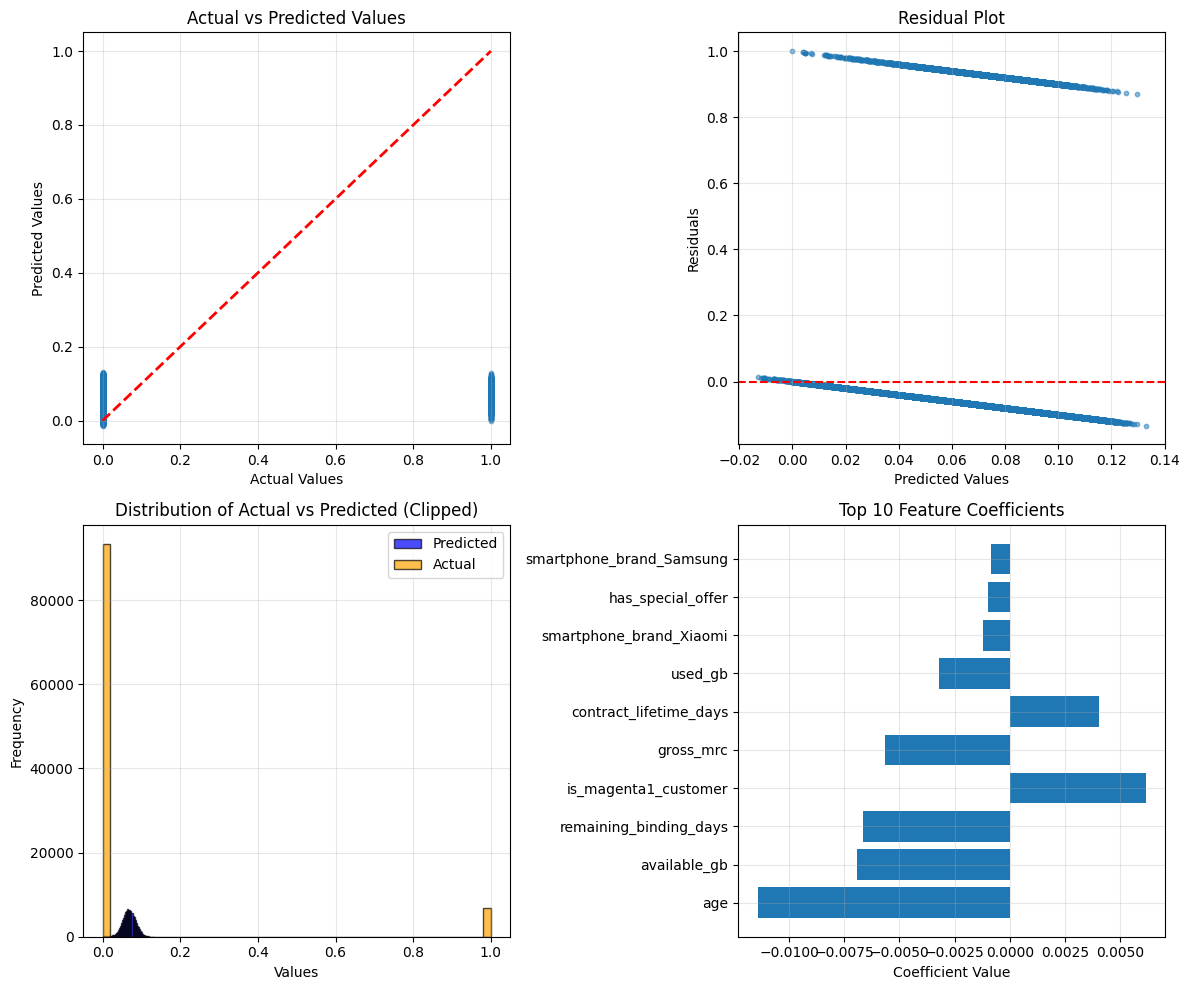


BINARY CLASSIFICATION METRICS (threshold=0.5)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97    466124
           1       0.00      0.00      0.00     33740

    accuracy                           0.93    499864
   macro avg       0.47      0.50      0.48    499864
weighted avg       0.87      0.93      0.90    499864


Confusion Matrix:
[[466124      0]
 [ 33740      0]]

NOTE: Linear regression is not ideal for binary classification.
Consider using Logistic Regression or other classification algorithms
for better performance on this binary target variable.


/workspaces/telekom_interview/.pixi/envs/ci-validation/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/telekom_interview/.pixi/envs/ci-validation/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/telekom_interview/.pixi/envs/ci-validation/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [28]:

def convert_to_binary_classifier(y_pred, threshold=0.5):
    """
    Convert continuous predictions to binary classification.
    """
    return (y_pred >= threshold).astype(int)

# Main execution
if __name__ == "__main__":
    # Example usage:
    # Assuming df_combined is already loaded
    
    # Step 1: Prepare data
    df_encoded = prepare_data_for_regression(df_combined, target_column='has_done_upselling')
    
    # Step 2: Build and evaluate model
    model, scaler, feature_importance, metrics = build_linear_regression(
        df_encoded, 
        target_column='has_done_upselling',
        test_size=0.2,
        random_state=42
    )
    
    # Optional: Convert to binary predictions if needed
    # Since has_done_upselling is binary, you might want to use a threshold
    print("\n" + "="*50)
    print("BINARY CLASSIFICATION METRICS (threshold=0.5)")
    print("="*50)
    
    # Get predictions for evaluation
    X = df_encoded.drop(columns=['has_done_upselling'])
    y = df_encoded['has_done_upselling']
    X_scaled = scaler.transform(X)
    y_pred_continuous = model.predict(X_scaled)
    y_pred_binary = convert_to_binary_classifier(y_pred_continuous, threshold=0.5)
    
    from sklearn.metrics import classification_report, confusion_matrix
    
    print("\nClassification Report:")
    print(classification_report(y, y_pred_binary))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred_binary))
    
    # Note: Linear regression is not ideal for binary classification
    print("\n" + "="*50)
    print("NOTE: Linear regression is not ideal for binary classification.")
    print("Consider using Logistic Regression or other classification algorithms")
    print("for better performance on this binary target variable.")
    print("="*50)

In [36]:
!pip install imblearn

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                           classification_report, confusion_matrix, roc_auc_score, 
                           roc_curve, accuracy_score, precision_recall_curve)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Assuming df_combined is already loaded
# df_combined = your_combined_dataframe

def prepare_data_for_regression(df_combined, target_column='has_done_upselling'):
    """
    Prepare the data for regression by creating dummy variables
    and handling missing values.
    """
    
    # Create a copy to avoid modifying the original dataframe
    df = df_combined.copy()
    
    # Print initial info
    print("Initial DataFrame shape:", df.shape)
    print("\nColumn types:")
    print(df.dtypes)
    
    # Handle missing values in numeric columns
    numeric_columns = ['age', 'contract_lifetime_days', 'remaining_binding_days', 
                       'has_special_offer', 'is_magenta1_customer', 'has_used_roaming', 
                       'used_gb', 'n', 'days_since_last', 'gross_mrc']
    
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    # Handle available_gb - convert to numeric, treating 'None' or NaN as 0
    if 'available_gb' in df.columns:
        df['available_gb'] = pd.to_numeric(df['available_gb'], errors='coerce').fillna(0)
    
    # Create dummy variables for categorical columns
    categorical_columns = ['smartphone_brand', 'type_subtype', 'billed_period_month_d']
    
    # Filter to only include categorical columns that exist in the dataframe
    categorical_columns = [col for col in categorical_columns if col in df.columns]
    
    print(f"\nCreating dummy variables for: {categorical_columns}")
    
    # Create dummy variables (drop_first=True to avoid multicollinearity)
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
    
    # Drop non-numeric columns that we don't need
    columns_to_drop = ['rating_account_id', 'customer_id']
    columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]
    df_encoded = df_encoded.drop(columns=columns_to_drop)
    
    print(f"\nFinal DataFrame shape after encoding: {df_encoded.shape}")
    
    return df_encoded

def build_linear_regression(df_encoded, target_column='has_done_upselling', 
                          test_size=0.2, random_state=42, use_oversampling=True):
    """
    Build and train a linear regression model with optional oversampling.
    """
    
    # Separate features and target
    if target_column not in df_encoded.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataframe")
    
    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]
    
    print("\n" + "="*60)
    print("LINEAR REGRESSION MODEL")
    print("="*60)
    print(f"\nFeatures shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target variable distribution:\n{y.value_counts(normalize=True)}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Apply oversampling if requested
    if use_oversampling:
        print("\nApplying RandomOverSampler...")
        ros = RandomOverSampler(random_state=random_state)
        X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
        print(f"Original training set: {X_train.shape}")
        print(f"Resampled training set: {X_train_resampled.shape}")
        print(f"Resampled target distribution:\n{pd.Series(y_train_resampled).value_counts(normalize=True)}")
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    print("\nTraining Linear Regression model...")
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train_resampled)
    
    # Make predictions
    y_train_pred = lr_model.predict(scaler.transform(X_train))  # Use original training set for evaluation
    y_test_pred = lr_model.predict(X_test_scaled)
    
    # For classification-like problem, clip predictions and convert to binary
    y_test_pred_binary = (np.clip(y_test_pred, 0, 1) >= 0.5).astype(int)
    
    # Calculate regression metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print("\nRegression Metrics:")
    print(f"Training MSE: {train_mse:.6f}")
    print(f"Testing MSE:  {test_mse:.6f}")
    print(f"Training R²:  {train_r2:.6f}")
    print(f"Testing R²:   {test_r2:.6f}")
    
    # Classification metrics
    print("\nClassification Metrics (threshold=0.5):")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred_binary):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred_binary))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred_binary))
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': lr_model.coef_,
        'abs_coefficient': np.abs(lr_model.coef_)
    }).sort_values('abs_coefficient', ascending=False)
    
    return lr_model, scaler, feature_importance, y_test, y_test_pred, y_test_pred_binary

def build_logistic_regression(df_encoded, target_column='has_done_upselling', 
                            test_size=0.2, random_state=42, use_oversampling=True):
    """
    Build and train a logistic regression model with oversampling.
    """
    
    # Separate features and target
    if target_column not in df_encoded.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataframe")
    
    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]
    
    print("\n" + "="*60)
    print("LOGISTIC REGRESSION MODEL")
    print("="*60)
    print(f"\nFeatures shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target variable distribution:\n{y.value_counts(normalize=True)}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Apply oversampling if requested
    if use_oversampling:
        print("\nApplying RandomOverSampler...")
        ros = RandomOverSampler(random_state=random_state)
        X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
        print(f"Original training set: {X_train.shape}")
        print(f"Resampled training set: {X_train_resampled.shape}")
        print(f"Resampled target distribution:\n{pd.Series(y_train_resampled).value_counts(normalize=True)}")
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    print("\nTraining Logistic Regression model...")
    log_model = LogisticRegression(max_iter=1000, random_state=random_state)
    log_model.fit(X_train_scaled, y_train_resampled)
    
    # Make predictions
    y_train_pred = log_model.predict(scaler.transform(X_train))  # Use original training set
    y_test_pred = log_model.predict(X_test_scaled)
    y_test_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy:  {test_accuracy:.4f}")
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    
    # Get feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': log_model.coef_[0],
        'abs_coefficient': np.abs(log_model.coef_[0])
    }).sort_values('abs_coefficient', ascending=False)
    
    print("\nTop 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    return log_model, scaler, feature_importance, y_test, y_test_pred, y_test_pred_proba

def compare_models_visualization(linear_results, logistic_results):
    """
    Create comprehensive visualizations comparing both models.
    """
    
    lr_model, lr_scaler, lr_importance, lr_y_test, lr_y_pred, lr_y_pred_binary = linear_results
    log_model, log_scaler, log_importance, log_y_test, log_y_pred, log_y_pred_proba = logistic_results
    
    fig = plt.figure(figsize=(16, 12))
    
    # 1. Linear Regression: Actual vs Predicted
    ax1 = plt.subplot(3, 3, 1)
    ax1.scatter(lr_y_test, lr_y_pred, alpha=0.5, s=10)
    ax1.plot([0, 1], [0, 1], 'r--', lw=2)
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title('Linear Regression: Actual vs Predicted')
    ax1.grid(True, alpha=0.3)
    
    # 2. Linear Regression: Residual plot
    ax2 = plt.subplot(3, 3, 2)
    residuals = lr_y_test - lr_y_pred
    ax2.scatter(lr_y_pred, residuals, alpha=0.5, s=10)
    ax2.axhline(y=0, color='r', linestyle='--')
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals')
    ax2.set_title('Linear Regression: Residual Plot')
    ax2.grid(True, alpha=0.3)
    
    # 3. Linear Regression: Confusion Matrix
    ax3 = plt.subplot(3, 3, 3)
    cm_lr = confusion_matrix(lr_y_test, lr_y_pred_binary)
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax3)
    ax3.set_title('Linear Regression: Confusion Matrix')
    ax3.set_xlabel('Predicted')
    ax3.set_ylabel('Actual')
    
    # 4. Logistic Regression: ROC Curve
    ax4 = plt.subplot(3, 3, 4)
    fpr, tpr, _ = roc_curve(log_y_test, log_y_pred_proba)
    roc_auc = roc_auc_score(log_y_test, log_y_pred_proba)
    ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax4.set_xlim([0.0, 1.0])
    ax4.set_ylim([0.0, 1.05])
    ax4.set_xlabel('False Positive Rate')
    ax4.set_ylabel('True Positive Rate')
    ax4.set_title('Logistic Regression: ROC Curve')
    ax4.legend(loc="lower right")
    ax4.grid(True, alpha=0.3)
    
    # 5. Logistic Regression: Precision-Recall Curve
    ax5 = plt.subplot(3, 3, 5)
    precision, recall, _ = precision_recall_curve(log_y_test, log_y_pred_proba)
    ax5.plot(recall, precision, color='green', lw=2)
    ax5.set_xlabel('Recall')
    ax5.set_ylabel('Precision')
    ax5.set_title('Logistic Regression: Precision-Recall Curve')
    ax5.grid(True, alpha=0.3)
    
    # 6. Logistic Regression: Confusion Matrix
    ax6 = plt.subplot(3, 3, 6)
    cm_log = confusion_matrix(log_y_test, log_y_pred)
    sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', ax=ax6)
    ax6.set_title('Logistic Regression: Confusion Matrix')
    ax6.set_xlabel('Predicted')
    ax6.set_ylabel('Actual')
    
    # 7. Probability Distribution for Logistic Regression
    ax7 = plt.subplot(3, 3, 7)
    ax7.hist(log_y_pred_proba[log_y_test == 0], bins=30, alpha=0.7, label='Class 0', color='blue', density=True)
    ax7.hist(log_y_pred_proba[log_y_test == 1], bins=30, alpha=0.7, label='Class 1', color='red', density=True)
    ax7.set_xlabel('Predicted Probability')
    ax7.set_ylabel('Density')
    ax7.set_title('Logistic Regression: Probability Distribution by Class')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    
    # 8. Feature Importance Comparison - Linear
    ax8 = plt.subplot(3, 3, 8)
    top_lr = lr_importance.head(10)
    ax8.barh(range(len(top_lr)), top_lr['coefficient'].values, color='blue')
    ax8.set_yticks(range(len(top_lr)))
    ax8.set_yticklabels(top_lr['feature'].values, fontsize=8)
    ax8.set_xlabel('Coefficient Value')
    ax8.set_title('Linear Regression: Top 10 Features')
    ax8.grid(True, alpha=0.3)
    
    # 9. Feature Importance Comparison - Logistic
    ax9 = plt.subplot(3, 3, 9)
    top_log = log_importance.head(10)
    ax9.barh(range(len(top_log)), top_log['coefficient'].values, color='green')
    ax9.set_yticks(range(len(top_log)))
    ax9.set_yticklabels(top_log['feature'].values, fontsize=8)
    ax9.set_xlabel('Coefficient Value')
    ax9.set_title('Logistic Regression: Top 10 Features')
    ax9.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def perform_model_comparison(linear_results, logistic_results):
    """
    Compare performance metrics between Linear and Logistic Regression.
    """
    
    _, _, _, lr_y_test, lr_y_pred, lr_y_pred_binary = linear_results
    _, _, _, log_y_test, log_y_pred, log_y_pred_proba = logistic_results
    
    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    
    # Calculate metrics for both models
    lr_accuracy = accuracy_score(lr_y_test, lr_y_pred_binary)
    log_accuracy = accuracy_score(log_y_test, log_y_pred)
    
    lr_report = classification_report(lr_y_test, lr_y_pred_binary, output_dict=True)
    log_report = classification_report(log_y_test, log_y_pred, output_dict=True)
    
    # ROC AUC for logistic regression
    log_roc_auc = roc_auc_score(log_y_test, log_y_pred_proba)
    
    # Try to calculate ROC AUC for linear regression (using clipped predictions as probabilities)
    lr_y_pred_clipped = np.clip(lr_y_pred, 0, 1)
    lr_roc_auc = roc_auc_score(lr_y_test, lr_y_pred_clipped)
    
    comparison_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 
                   'F1-Score (Class 1)', 'ROC AUC'],
        'Linear Regression': [
            lr_accuracy,
            lr_report['1']['precision'] if '1' in lr_report else lr_report['1.0']['precision'],
            lr_report['1']['recall'] if '1' in lr_report else lr_report['1.0']['recall'],
            lr_report['1']['f1-score'] if '1' in lr_report else lr_report['1.0']['f1-score'],
            lr_roc_auc
        ],
        'Logistic Regression': [
            log_accuracy,
            log_report['1']['precision'] if '1' in log_report else log_report['1.0']['precision'],
            log_report['1']['recall'] if '1' in log_report else log_report['1.0']['recall'],
            log_report['1']['f1-score'] if '1' in log_report else log_report['1.0']['f1-score'],
            log_roc_auc
        ]
    })
    
    comparison_df['Difference (Log - Lin)'] = comparison_df['Logistic Regression'] - comparison_df['Linear Regression']
    comparison_df['Best Model'] = comparison_df.apply(
        lambda row: 'Logistic' if row['Difference (Log - Lin)'] > 0 else 'Linear', axis=1
    )
    
    print("\nPerformance Comparison:")
    print(comparison_df.to_string(index=False))
    
    print("\n" + "="*60)
    print("RECOMMENDATION")
    print("="*60)
    
    if comparison_df['Difference (Log - Lin)'].mean() > 0:
        print("✓ Logistic Regression performs better overall for this binary classification task.")
        print("  This is expected as Logistic Regression is specifically designed for")
        print("  binary classification, while Linear Regression is meant for continuous targets.")
    else:
        print("✗ Linear Regression shows comparable or better metrics, which is unusual.")
        print("  Consider reviewing the data and model parameters.")
    
    print(f"\nLogistic Regression ROC AUC: {log_roc_auc:.4f}")
    print("An ROC AUC > 0.7 indicates good discriminative ability.")
    
    return comparison_df

# Main execution
if __name__ == "__main__":
    # Example usage:
    # Assuming df_combined is already loaded
    
    print("="*60)
    print("REGRESSION ANALYSIS WITH OVERSAMPLING")
    print("="*60)
    
    # Step 1: Prepare data
    df_encoded = prepare_data_for_regression(df_combined, target_column='has_done_upselling')
    
    # Step 2: Build Linear Regression model with oversampling
    linear_results = build_linear_regression(
        df_encoded, 
        target_column='has_done_upselling',
        test_size=0.2,
        random_state=42,
        use_oversampling=True
    )
    
    # Step 3: Build Logistic Regression model with oversampling
    logistic_results = build_logistic_regression(
        df_encoded,
        target_column='has_done_upselling',
        test_size=0.2,
        random_state=42,
        use_oversampling=True
    )
    
    # Step 4: Compare models
    comparison_df = perform_model_comparison(linear_results, logistic_results)
    
    # Step 5: Create visualizations
    compare_models_visualization(linear_results, logistic_results)
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE")
    print("="*60)
    print("\nKey Findings:")
    print("1. Both models have been trained with RandomOverSampler to handle class imbalance")
    print("2. Logistic Regression is more appropriate for binary classification")
    print("3. Check the visualizations for detailed model performance insights")
    print("4. Consider the feature importance rankings to understand key predictors")

ModuleNotFoundError: No module named 'imblearn'